<a href="https://colab.research.google.com/github/HaroldRen99/22WEcon441/blob/main/22w441b_In_Class_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the Credit Card Fraud Data From CCLE

In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/fraudTest.csv")

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
# Data cleaning
df.drop("Unnamed: 0", axis = 1, inplace = True)
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["dob"] = pd.to_datetime(df['dob'])

In [ ]:
# Make dummies out of categorical variables
dummies = pd.get_dummies(df["category"])
df = pd.concat([dummies, df], axis = 1)

In [ ]:
# Generate unique time variable
df['age'] = [i.days/365 for i in df["trans_date_trans_time"] - df["dob"]]
df[['age']].describe()

,age
count,555719.000000
mean,46.920102
std,17.443143
min,15.402740
25%,33.471233
50%,44.939726
75%,58.095890
max,96.235616


In [ ]:
# Get X & y dataset
x_list = [column for column in df.columns]
for i in ["is_fraud","job","merchant","category","gender","street","city","state","dob","trans_num","trans_date_trans_time","first","last"]:
  x_list.remove(i)
data = df[x_list].copy()
target = df['is_fraud'].copy()

In [ ]:
# Normalize all the data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data)
data = scaler.transform(data)
data = pd.DataFrame(columns = x_list, data = data)
data.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,...,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,age
0,-0.278889,-0.275743,-0.335987,-0.190323,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,-0.257570,...,-0.317252,-0.424463,-0.731091,-0.904377,0.677451,0.816521,-1.703871,-0.894145,0.657586,0.308032
1,-0.278889,-0.275743,-0.335987,-0.190323,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,-0.257570,...,-0.316273,-0.252337,1.309217,0.351182,-1.472454,-0.292685,-1.703869,0.178126,-1.436610,-0.944414
2,-0.278889,-0.275743,-0.335987,-0.190323,-0.323179,3.762040,-0.322472,-0.309894,-0.227589,-0.257570,...,-0.316254,-0.179353,-1.382695,0.420768,1.216667,-0.178853,-1.703865,0.383257,1.167640,0.159448
3,-0.278889,-0.275743,-0.335987,-0.190323,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,3.882438,...,-0.316259,-0.059605,-0.598119,-1.970539,0.685934,-0.111371,-1.703861,-1.909485,0.680717,-0.801955
4,-0.278889,-0.275743,-0.335987,-0.190323,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,-0.257570,...,-0.316308,-0.422358,0.029394,1.128092,0.380004,-0.289942,-1.703861,1.259139,0.316510,1.036820


# Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.3, random_state=42)

# Make three sets of training data (Oversample, Undersample and SMOTE)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
train_data_over, train_target_over = ros.fit_resample(train_data, train_target)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
train_data_under, train_target_under = rus.fit_resample(train_data, train_target)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
train_data_smote, train_target_smote = smote.fit_resample(train_data, train_target)

# Train three logistic regression models 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Over
log_over = LogisticRegression()
result_over = log_over.fit(train_data_over, train_target_over)
y_pred_over = result_over.predict(test_data)
y_pred_over.sum()

16099

In [ ]:
# Under
log_under = LogisticRegression()
result_under = log_under.fit(train_data_under, train_target_under)
y_pred_under = result_under.predict(test_data)
y_pred_under.sum()

16891

In [ ]:
# SMOTE
log_smote = LogisticRegression()
result_smote = log_smote.fit(train_data_smote, train_target_smote)
y_pred_smote = log_smote.predict(test_data)
y_pred_smote.sum()

16797

# Test the three models

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Over
print(result_over.score(train_data_over, train_target_over))
accuracy_score(test_target, y_pred_over)

0.8254920025393679


0.9053660116605485

In [ ]:
# Under
print(result_under.score(train_data_under, train_target_under))
accuracy_score(test_target, y_pred_under)

0.8272425249169435


0.9006274142853715

In [ ]:
# SMOTE
print(result_smote.score(train_data_under, train_target_under))
accuracy_score(test_target, y_pred_smote)

0.8219269102990033


0.9011792509417212

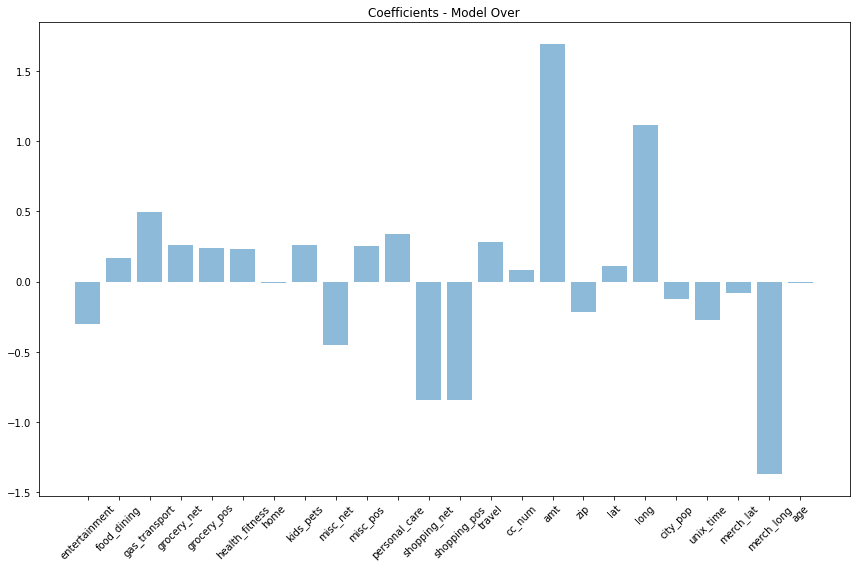

In [ ]:
# Over
plt.figure(figsize = (12,8))
plt.bar(x_list, result_over.coef_[0], alpha = 0.5)
plt.xticks(rotation=45)
plt.title("Coefficients - Model Over")
plt.tight_layout()
plt.show()

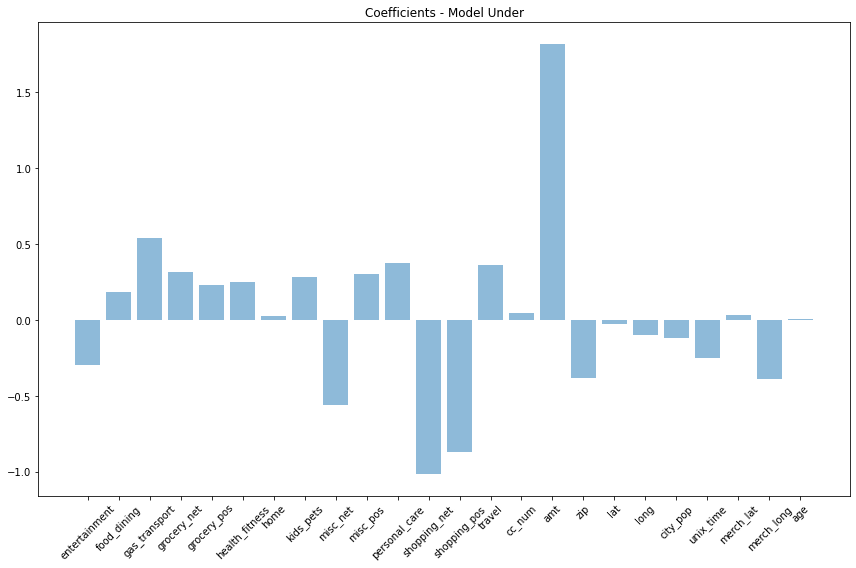

In [ ]:
# Under
plt.figure(figsize = (12,8))
plt.bar(x_list, result_under.coef_[0], alpha = 0.5)
plt.xticks(rotation=45)
plt.title("Coefficients - Model Under")
plt.tight_layout()
plt.show()

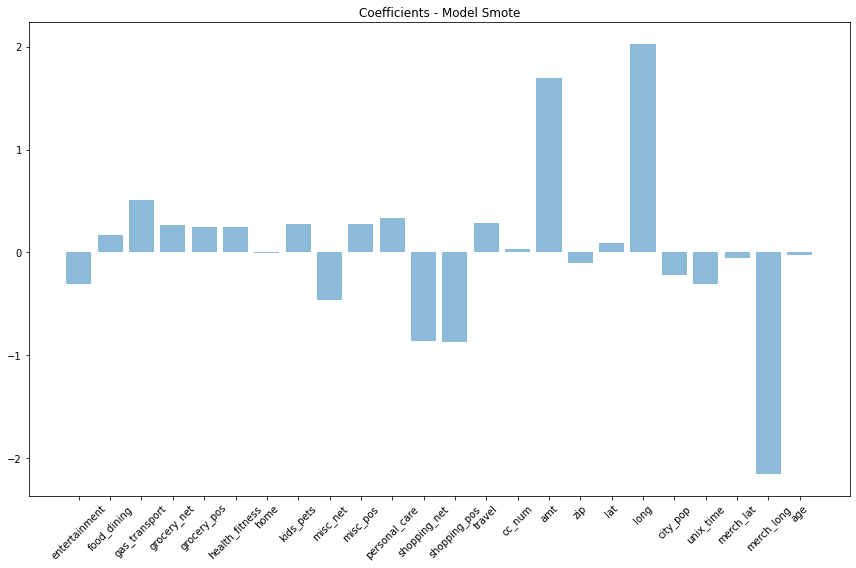

In [ ]:
# Under
plt.figure(figsize = (12,8))
plt.bar(x_list, result_smote.coef_[0], alpha = 0.5)
plt.xticks(rotation=45)
plt.title("Coefficients - Model Smote")
plt.tight_layout()
plt.show()

# Which performed best in Out of Sample metrics?

According to the result, the ordinary oversample method seems to stand out. It has the best predict accuracy (90.54%) when using test dataset and the train accuracy (82.55%) is pretty good.

# Pick two features and plot the two classes before and after SMOTE.

In [ ]:
# Dataset before SMOTE
df_before_smote = pd.concat([train_data, train_target], axis = 1)
df_before_smote

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,...,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,age,is_fraud
227898,-0.278889,-0.275743,-0.335987,-0.190323,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,-0.257570,...,0.476167,1.827105,0.856859,-1.971297,-0.291557,-0.349689,0.656949,-1.990715,-1.152526,0
526423,-0.278889,-0.275743,-0.335987,-0.190323,-0.323179,-0.265813,3.101043,-0.309894,-0.227589,-0.257570,...,-0.298399,-0.991598,0.069576,0.952357,0.396777,1.405959,0.105149,0.917455,-0.597140,0
361632,3.585659,-0.275743,-0.335987,-0.190323,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,-0.257570,...,-0.078744,-1.550334,0.421124,1.166572,0.122324,0.627661,0.527597,1.118587,-0.401907,0
234967,-0.278889,-0.275743,2.976309,-0.190323,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,-0.257570,...,0.016569,0.286960,1.666448,-0.450224,-0.278683,-0.297418,1.816534,-0.406088,1.405768,0
37330,-0.278889,-0.275743,-0.335987,-0.190323,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,3.882438,...,-0.083082,-0.028100,0.785000,0.528221,0.152582,-1.487181,0.584647,0.488726,-0.387771,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,-0.278889,-0.275743,-0.335987,-0.190323,3.094261,-0.265813,-0.322472,-0.309894,-0.227589,-0.257570,...,0.222380,-0.871361,0.163662,0.904288,-0.287282,-1.075395,0.080978,0.961180,0.433999,0
259178,-0.278889,-0.275743,-0.335987,-0.190323,-0.323179,-0.265813,3.101043,-0.309894,-0.227589,-0.257570,...,0.127450,0.465174,0.519576,0.073797,-0.291920,-0.123769,0.374057,0.136419,1.022370,0
365838,-0.278889,-0.275743,-0.335987,-0.190323,-0.323179,-0.265813,-0.322472,-0.309894,4.393879,-0.257570,...,-0.410364,-0.146736,0.437167,0.562539,0.015856,0.648888,0.586901,0.541320,0.319184,0
131932,-0.278889,-0.275743,-0.335987,-0.190323,3.094261,-0.265813,-0.322472,-0.309894,-0.227589,-0.257570,...,0.845874,-0.662687,-1.071626,0.466982,-0.282562,-0.943046,-1.112905,0.447082,-0.959492,0


In [ ]:
# Dataset after SMOTE
df_after_smote = pd.concat([train_data_smote, train_target_smote], axis = 1)
df_after_smote

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,...,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,age,is_fraud
0,-0.278889,-0.275743,-0.335987,-0.190323,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,-0.257570,...,0.476167,1.827105,0.856859,-1.971297,-0.291557,-0.349689,0.656949,-1.990715,-1.152526,0
1,-0.278889,-0.275743,-0.335987,-0.190323,-0.323179,-0.265813,3.101043,-0.309894,-0.227589,-0.257570,...,-0.298399,-0.991598,0.069576,0.952357,0.396777,1.405959,0.105149,0.917455,-0.597140,0
2,3.585659,-0.275743,-0.335987,-0.190323,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,-0.257570,...,-0.078744,-1.550334,0.421124,1.166572,0.122324,0.627661,0.527597,1.118587,-0.401907,0
3,-0.278889,-0.275743,2.976309,-0.190323,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,-0.257570,...,0.016569,0.286960,1.666448,-0.450224,-0.278683,-0.297418,1.816534,-0.406088,1.405768,0
4,-0.278889,-0.275743,-0.335987,-0.190323,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,3.882438,...,-0.083082,-0.028100,0.785000,0.528221,0.152582,-1.487181,0.584647,0.488726,-0.387771,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774991,-0.278889,-0.275743,-0.335987,-0.190323,-0.323179,-0.265813,-0.322472,-0.309894,4.393879,-0.257570,...,4.399291,-1.220829,0.540165,0.731361,-0.291643,0.848545,0.531980,0.766271,-1.351759,1
774992,-0.278889,3.626563,-0.335987,-0.190323,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,-0.257570,...,0.425762,0.991004,-1.014889,-0.437671,-0.280784,-0.945374,-1.126975,-0.395823,-0.266260,1
774993,-0.278889,-0.275743,-0.335987,-0.190323,-0.323179,3.762040,-0.322472,-0.309894,-0.227589,-0.257570,...,-0.299562,-0.714064,-0.835280,0.589811,-0.289632,-0.453630,-0.761560,0.597411,-0.696875,1
774994,-0.278889,-0.275743,-0.335987,-0.190323,-0.323179,-0.265813,-0.322472,-0.309894,-0.227589,-0.257570,...,-0.315563,1.243122,0.827203,-1.054607,-0.292888,-0.816041,0.736378,-1.047308,-0.414786,1


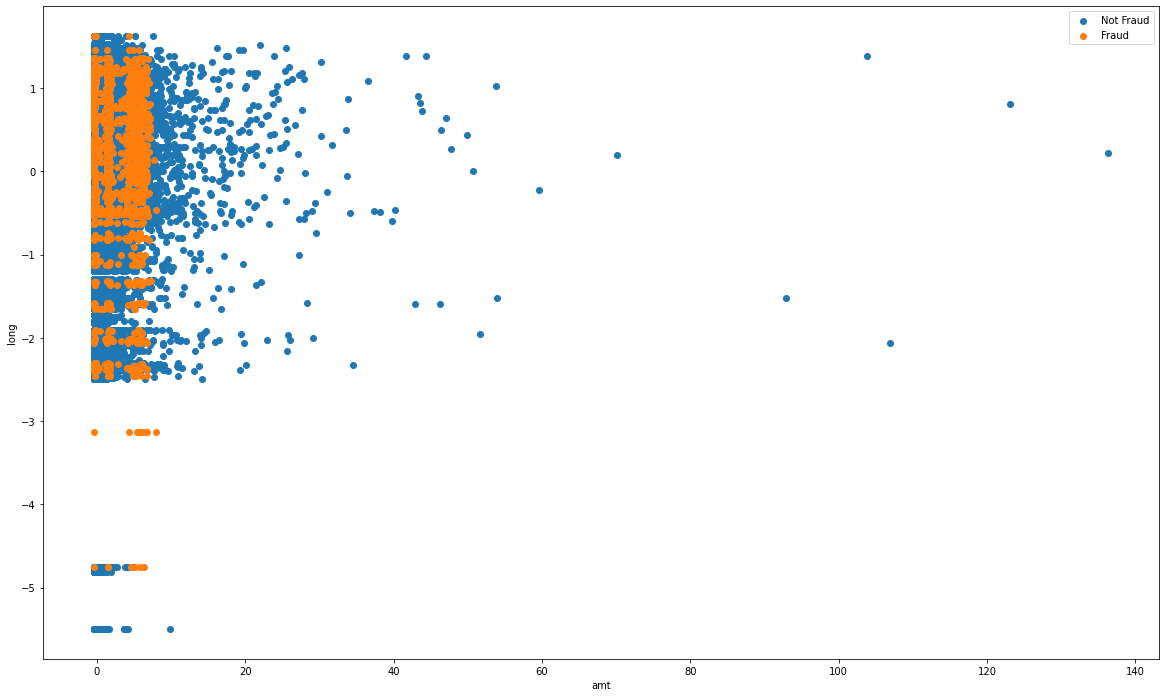

In [ ]:
# Plot before SMOTE
plt.figure(figsize = (20,12))
plt.scatter(df_before_smote[df_before_smote['is_fraud'] == 0]['amt'], df_before_smote[df_before_smote['is_fraud'] == 0]['long'])
plt.scatter(df_before_smote[df_before_smote['is_fraud'] == 1]['amt'], df_before_smote[df_before_smote['is_fraud'] == 1]['long'])
plt.legend(['Not Fraud', 'Fraud'])
plt.xlabel('amt')
plt.ylabel('long')
plt.show()

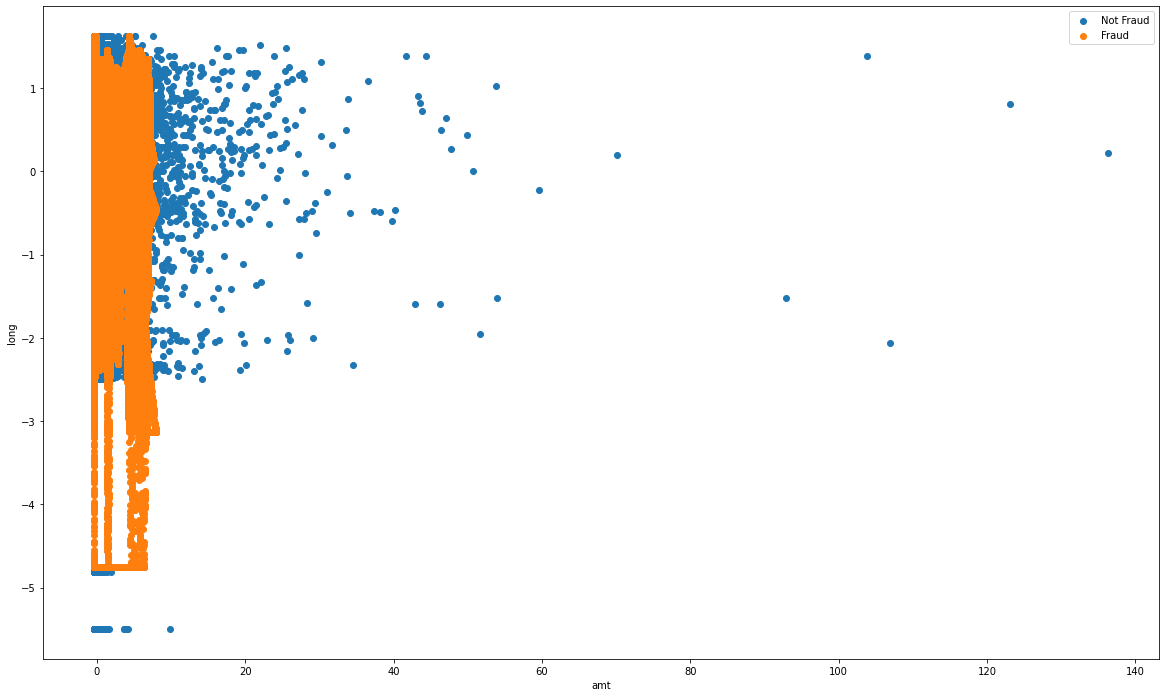

In [ ]:
# Plot after SMOTE
plt.figure(figsize = (20,12))
plt.scatter(df_after_smote[df_after_smote['is_fraud'] == 0]['amt'], df_after_smote[df_after_smote['is_fraud'] == 0]['long'])
plt.scatter(df_after_smote[df_after_smote['is_fraud'] == 1]['amt'], df_after_smote[df_after_smote['is_fraud'] == 1]['long'])
plt.legend(['Not Fraud', 'Fraud'])
plt.xlabel('amt')
plt.ylabel('long')
plt.show()